<a href="https://colab.research.google.com/github/simonowuor8/datasciencecoursera/blob/main/Victor_Mmayi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
!pip install pandas openpyxl
!pip install pmdarima

# **Loading Raw Data**

In [3]:
file_path = '/content/sample_data/predictive analysis_raw data (2).xlsx'   # Loading the excel file



In [4]:
df = pd.read_excel('/content/sample_data/predictive analysis_raw data (2).xlsx')  # Reading the excel file into dataframe

In [5]:
# Dropping the specified columns
columns_to_drop = ['STATISTIC', 'TLIST(A1)', 'C02062V02489', 'UNIT']
df = df.drop(columns=columns_to_drop)

# Drop rows where 'Statistic Label' is 'Variation in Meat Stocks'
df = df[df['Statistic Label'] != 'Variation in Meat Stocks']

# Renaming the VALUE column
df = df.rename(columns={'VALUE': 'Quantity (000 tonnes)'})

# Replace 'Pig meat' with 'Pork meat' in the 'Type of Meat' column
df['Type of Meat'] = df['Type of Meat'].replace('Pig meat', 'Pork meat')


# Filter the DataFrame to exclude rows where 'Type of Meat' is 'Total Meat'
df = df[df['Type of Meat'] != 'Total Meat']

# Display the first few rows of the modified DataFrame
print(df.head())


      Statistic Label  Year   Type of Meat  Quantity (000 tonnes)
1  Meat Slaughterings  2012  Beef and veal                  495.0
2  Meat Slaughterings  2012      Pork meat                  241.0
3  Meat Slaughterings  2012     Sheep meat                   54.0
4  Meat Slaughterings  2012   Poultry meat                  132.0
6  Meat Slaughterings  2013  Beef and veal                  518.0


Data Cleaning

In [6]:
# Rename observation in the 'Statistic label' column
df['Statistic Label'] = df['Statistic Label'].replace("Supplies = Uses of Meat Products", "Uses of Meat Products")

# Display the cleaned data to verify the change
print(df['Statistic Label'].unique())


['Meat Slaughterings' 'Meat Imports' 'Uses of Meat Products'
 'Meat Exports' 'Meat Products for Domestic Use'
 'Human Consumption of Meat Products' 'Meat Gross Indigenous Production'
 'Self Sufficiency in Meat Products']


# Exploratory Data Analysis

Frequency Table:
     Type of Meat  Quantity (000 tonnes)  Percentage (%)
0  Beef and veal           35003.942498       47.734449
1      Pork meat           19430.282212       26.496839
2   Poultry meat           12260.909307       16.720052
3     Sheep meat            6635.433903        9.048660
4          Total           73330.567920      100.000000


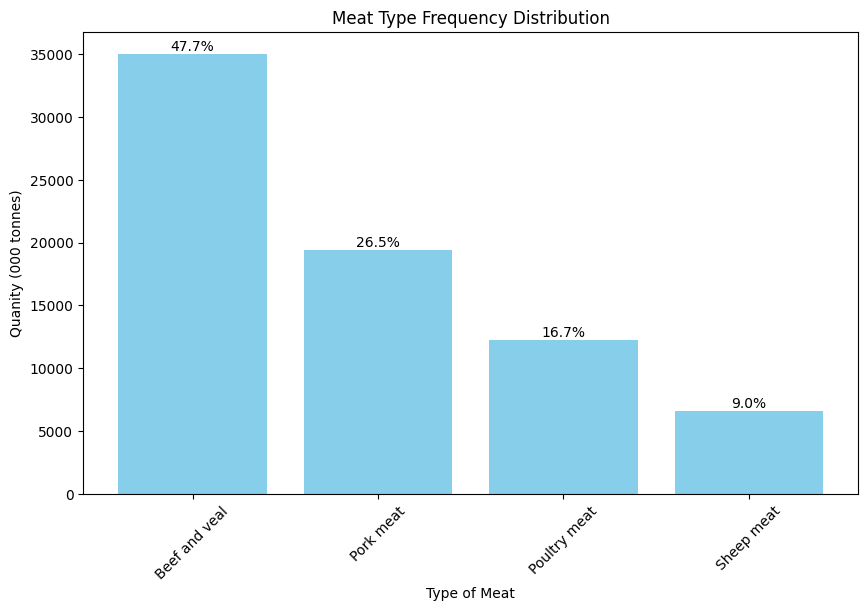

In [7]:
# Exclude 'Total Meat'
df_filtered = df[df['Type of Meat'] != 'Total Meat']

# Frequency Table with Sum and Percentage Frequency
frequency_table = df_filtered.groupby('Type of Meat')['Quantity (000 tonnes)'].sum().reset_index()
frequency_table.columns = ['Type of Meat', 'Quantity (000 tonnes)']

# Calculate Total Value and Percentage
total_value = frequency_table['Quantity (000 tonnes)'].sum()
frequency_table['Percentage (%)'] = (frequency_table['Quantity (000 tonnes)'] / total_value) * 100

# Append Total Row
total_row = pd.DataFrame({'Type of Meat': ['Total'],
                          'Quantity (000 tonnes)': [total_value],
                          'Percentage (%)': [100.0]})
frequency_table = pd.concat([frequency_table, total_row], ignore_index=True)

# Display Frequency Table
print("Frequency Table:\n", frequency_table)

# Bar Graph
plt.figure(figsize=(10, 6))
bars = plt.bar(frequency_table['Type of Meat'][:-1],  # Exclude 'Total' from graph
               frequency_table['Quantity (000 tonnes)'][:-1],
               color='skyblue')

# Add Percentage Labels on Top of Bars
for bar, percentage in zip(bars, frequency_table['Percentage (%)'][:-1]):
    plt.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
             bar.get_height(),  # Y-coordinate (top of the bar)
             f'{percentage:.1f}%',  # Format percentage to 1 decimal place
             ha='center', va='bottom', fontsize=10)

# Customize Graph Labels and Title
plt.xlabel('Type of Meat')
plt.ylabel('Quanity (000 tonnes)')
plt.title('Meat Type Frequency Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Frequency Table:
                       Statistic Label  Quantity (000 tonnes)  Percentage (%)
0  Human Consumption of Meat Products             967.143734        1.318882
1                        Meat Exports           10368.953913       14.140016
2    Meat Gross Indigenous Production           12695.557983       17.312777
3                        Meat Imports            3063.325900        4.177420
4      Meat Products for Domestic Use            4662.897032        6.358736
5                  Meat Slaughterings           11964.525045       16.315877
6   Self Sufficiency in Meat Products           14575.313366       19.876177
7               Uses of Meat Products           15032.850945       20.500115
8                               Total           73330.567920      100.000000


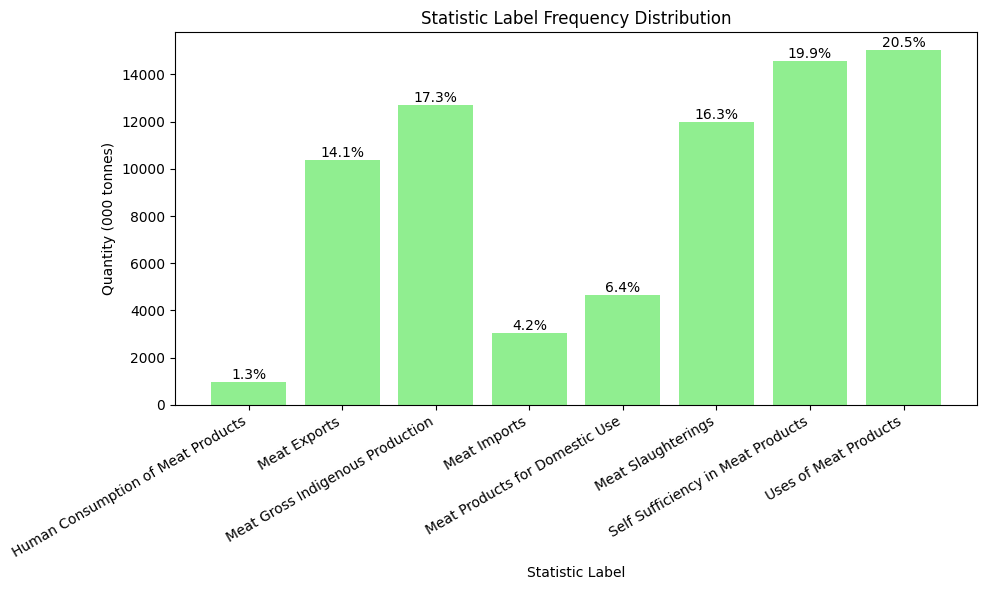

In [8]:
# Step 1: Drop rows with 'Variation in Meat Stock'
df_filtered = df[df['Statistic Label'] != 'Variation in Meat Stocks']

# Step 2: Group by 'Statistic Label' and calculate total values
stat_label_table = df_filtered.groupby('Statistic Label')['Quantity (000 tonnes)'].sum().reset_index()
stat_label_table.columns = ['Statistic Label', 'Quantity (000 tonnes)']

# Step 3: Calculate total sum and percentage frequency
total_value = stat_label_table['Quantity (000 tonnes)'].sum()
stat_label_table['Percentage (%)'] = (stat_label_table['Quantity (000 tonnes)'] / total_value) * 100

# Step 4: Append a 'Total' row for completeness
total_row = pd.DataFrame({
    'Statistic Label': ['Total'],
    'Quantity (000 tonnes)': [total_value],
    'Percentage (%)': [100.0]
})
stat_label_table = pd.concat([stat_label_table, total_row], ignore_index=True)

# Step 5: Display Frequency Table
print("Frequency Table:\n", stat_label_table)

# Step 6: Plot the Bar Graph for 'Statistic Label'
plt.figure(figsize=(10, 6))
bars = plt.bar(
    stat_label_table['Statistic Label'][:-1],  # Exclude 'Total' from the bar graph
    stat_label_table['Quantity (000 tonnes)'][:-1],
    color='lightgreen'
)

# Step 7: Add percentage labels on top of bars
for bar, percentage in zip(bars, stat_label_table['Percentage (%)'][:-1]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.1f}%',
        ha='center', va='bottom', fontsize=10
    )

# Step 8: Customize the Plot to Avoid Label Overlap
plt.xlabel('Statistic Label')
plt.ylabel('Quantity (000 tonnes)')
plt.title('Statistic Label Frequency Distribution')
plt.xticks(rotation=30, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Ensure everything fits within the plot area
plt.show()

Frequency Table:
                       Statistic Label  Quantity (000 tonnes)  Percentage (%)
0  Human Consumption of Meat Products             967.143734        1.318882
1                        Meat Exports           10368.953913       14.140016
2    Meat Gross Indigenous Production           12695.557983       17.312777
3                        Meat Imports            3063.325900        4.177420
4      Meat Products for Domestic Use            4662.897032        6.358736
5                  Meat Slaughterings           11964.525045       16.315877
6   Self Sufficiency in Meat Products           14575.313366       19.876177
7               Uses of Meat Products           15032.850945       20.500115
8                               Total           73330.567920      100.000000


<Figure size 1400x800 with 0 Axes>

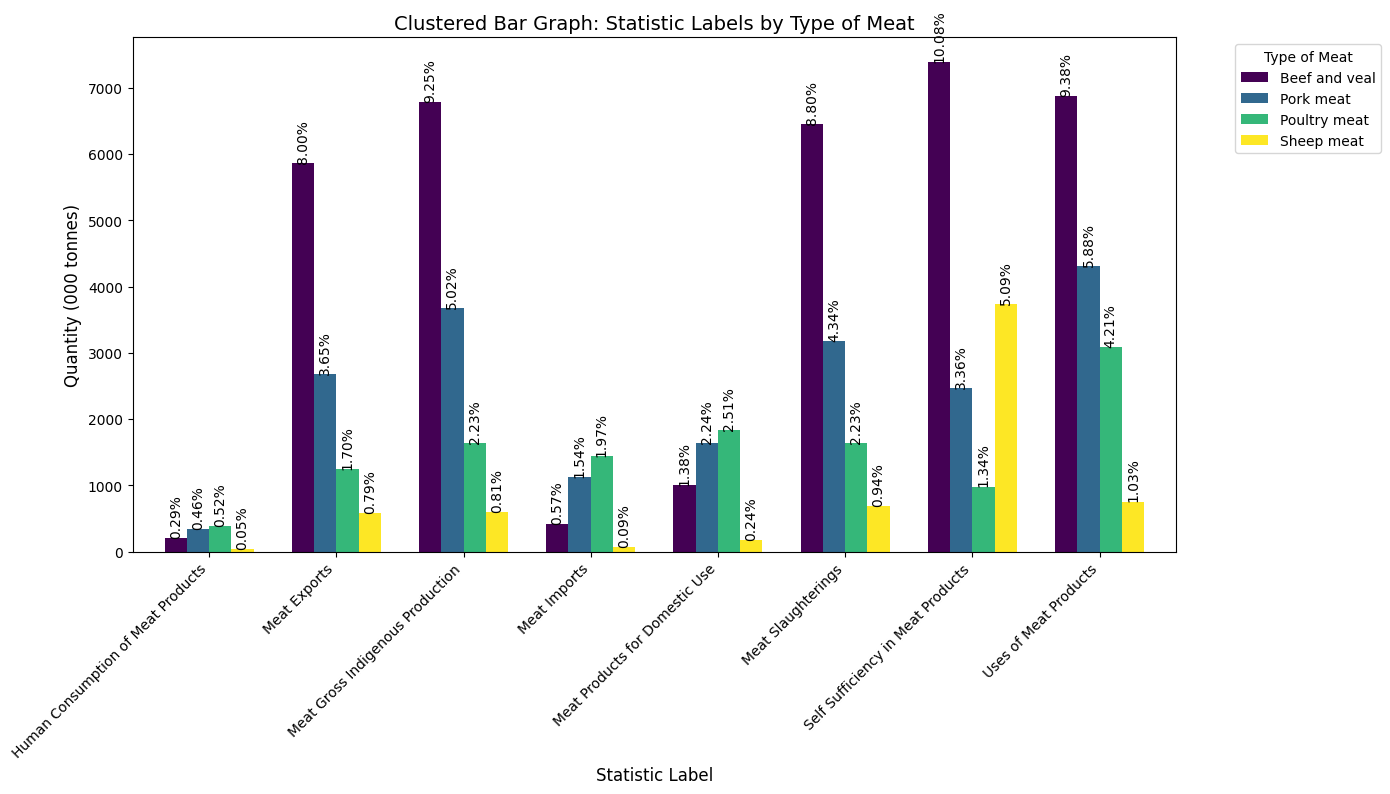

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter out unwanted observations
df_filtered = df[(df['Statistic Label'] != 'Variation in Meat Stocks') &
                 (df['Type of Meat'] != 'Total Meat')]

# Step 2: Create a Pivot Table (Statistic Label by Type of Meat)
pivot_df = df_filtered.pivot_table(
    index='Statistic Label',
    columns='Type of Meat',
    values='Quantity (000 tonnes)',  # Assuming 'VALUE' is the column with quantities
    aggfunc='sum',
    fill_value=0
)

# Step 3: Frequency Table (Sum and Percentage)
frequency_table = df_filtered.groupby('Statistic Label')['Quantity (000 tonnes)'].sum().reset_index()
frequency_table.columns = ['Statistic Label', 'Quantity (000 tonnes)']

# Calculate total and percentage frequency
total_value = frequency_table['Quantity (000 tonnes)'].sum()
frequency_table['Percentage (%)'] = (frequency_table['Quantity (000 tonnes)'] / total_value) * 100

# Append Total Row
total_row = pd.DataFrame({'Statistic Label': ['Total'],
                          'Quantity (000 tonnes)': [total_value],
                          'Percentage (%)': [100.0]})
frequency_table = pd.concat([frequency_table, total_row], ignore_index=True)

# Display the Frequency Table
print("Frequency Table:\n", frequency_table)

# Step 4: Plot the Clustered Bar Graph
plt.figure(figsize=(14, 8))  # Increase figure size to prevent overlap
bars = pivot_df.plot(kind='bar', width=0.7, figsize=(14, 8), colormap='viridis')

# Step 5: Add percentage labels on each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        # Calculate percentage for each bar
        percentage = (height / total_value) * 100 if total_value > 0 else 0
        plt.annotate(f'{percentage:.2f}%',  # Percentage value with two decimal places
                     (bar.get_x() + bar.get_width() / 2, height),  # Positioning
                     ha='center', va='bottom', fontsize=10, rotation=90)  # Rotated vertically

# Step 6: Customize the Plot
plt.xlabel('Statistic Label', fontsize=12)
plt.ylabel('Quantity (000 tonnes)', fontsize=12)
plt.title('Clustered Bar Graph: Statistic Labels by Type of Meat', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Type of Meat', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side
plt.tight_layout()  # Ensure everything fits within the plot area

# Step 7: Display the Plot
plt.show()


Frequency Table:
                       Statistic Label  Quantity (000 tonnes)  Percentage (%)
0  Human Consumption of Meat Products             967.143734        1.318882
1                        Meat Exports           10368.953913       14.140016
2    Meat Gross Indigenous Production           12695.557983       17.312777
3                        Meat Imports            3063.325900        4.177420
4      Meat Products for Domestic Use            4662.897032        6.358736
5                  Meat Slaughterings           11964.525045       16.315877
6   Self Sufficiency in Meat Products           14575.313366       19.876177
7               Uses of Meat Products           15032.850945       20.500115
8                               Total           73330.567920      100.000000


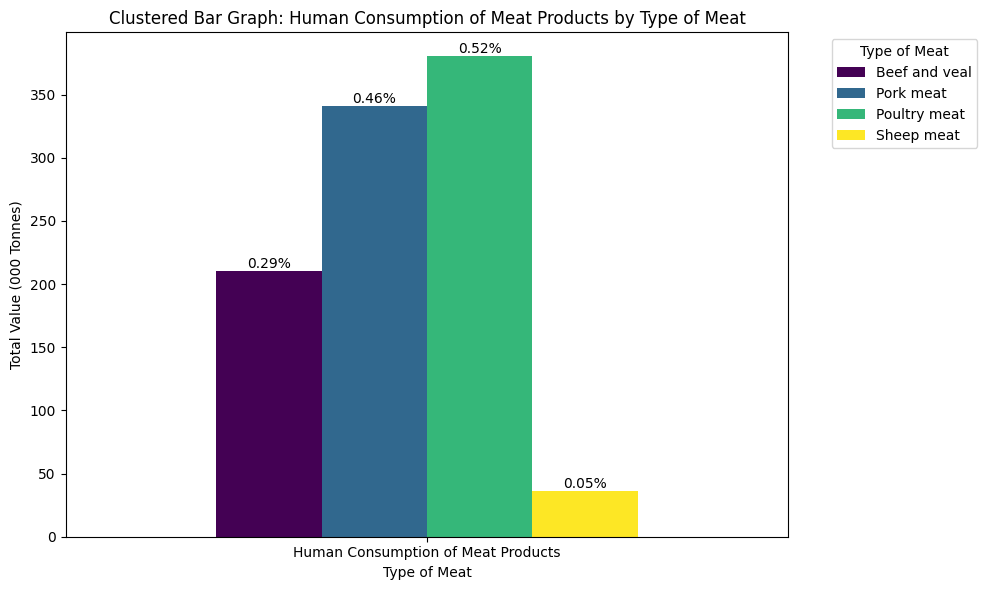

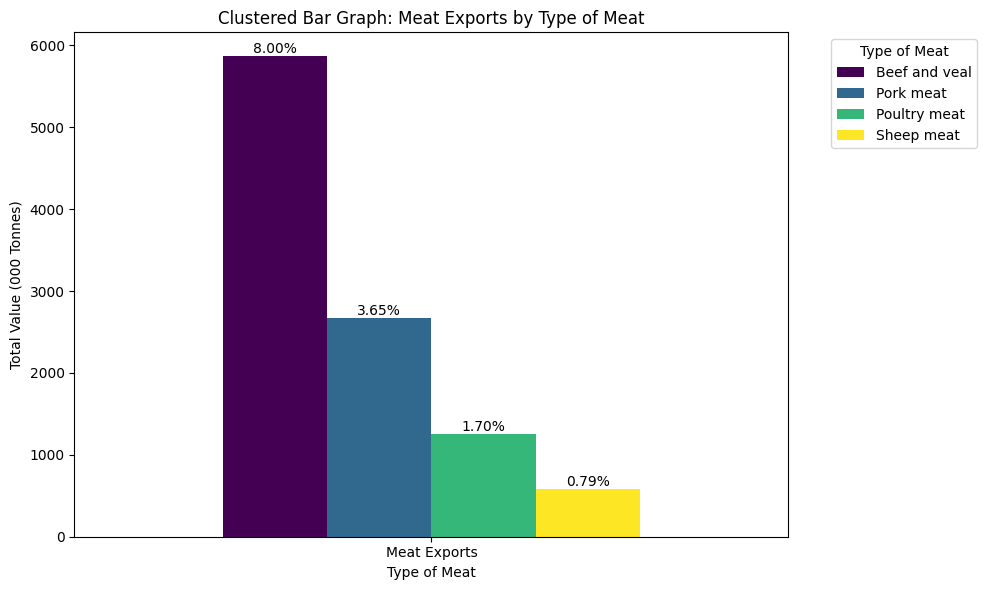

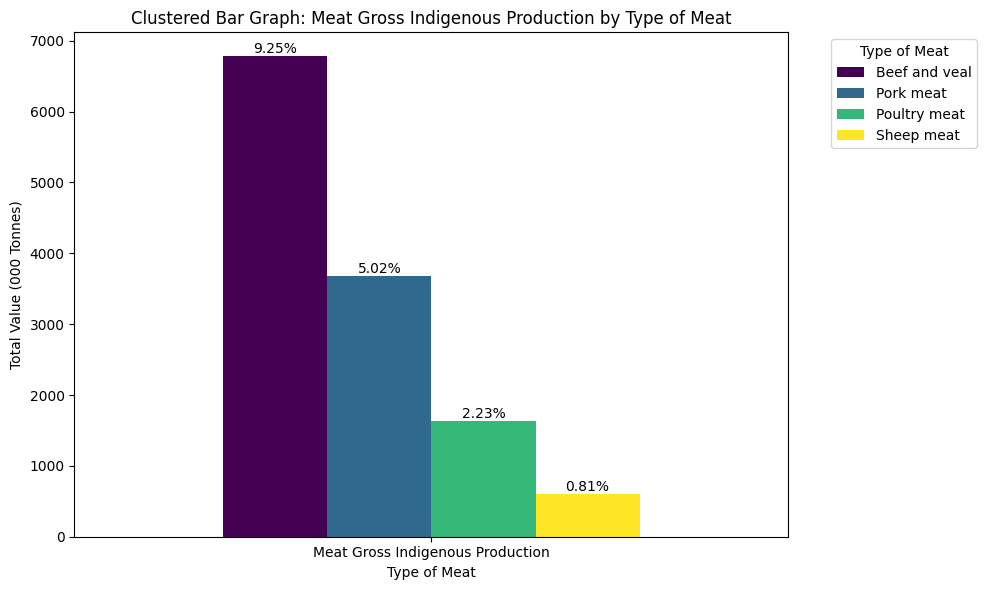

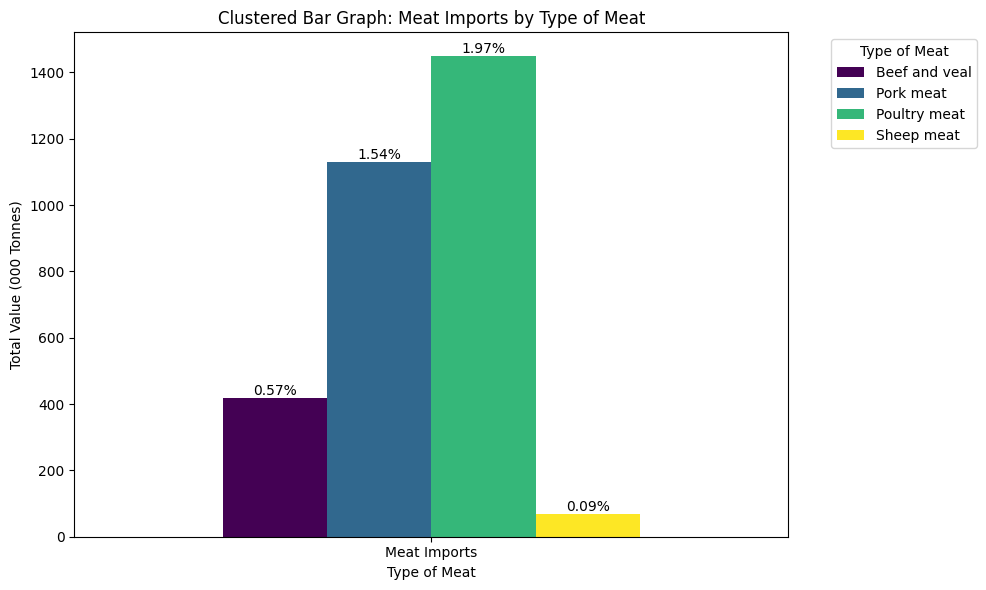

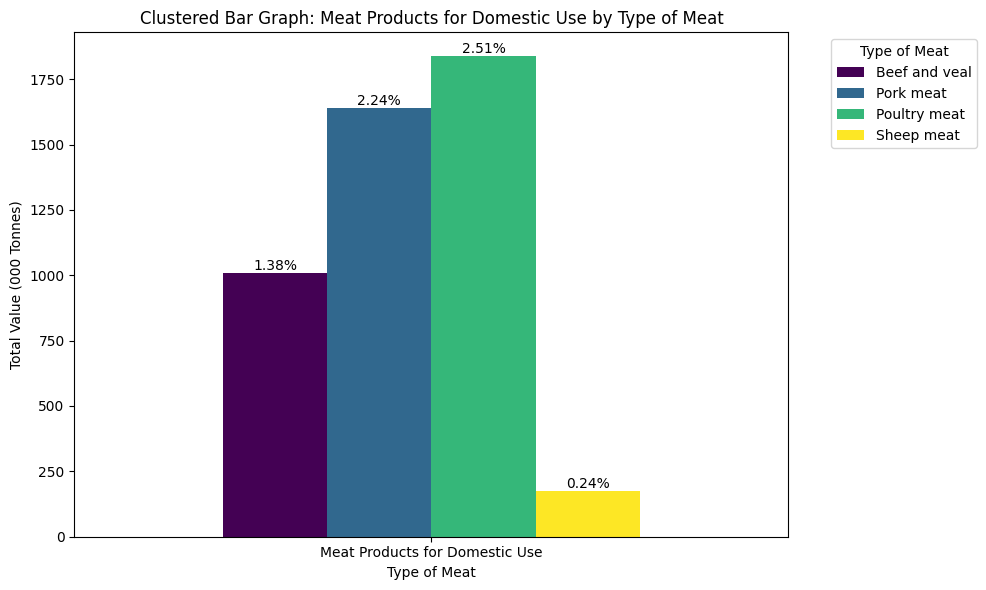

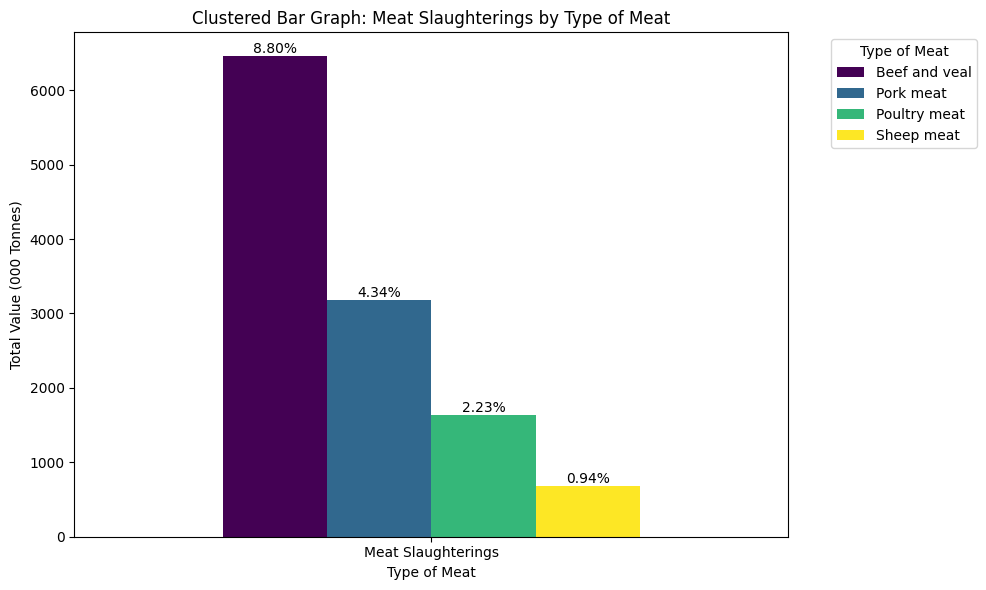

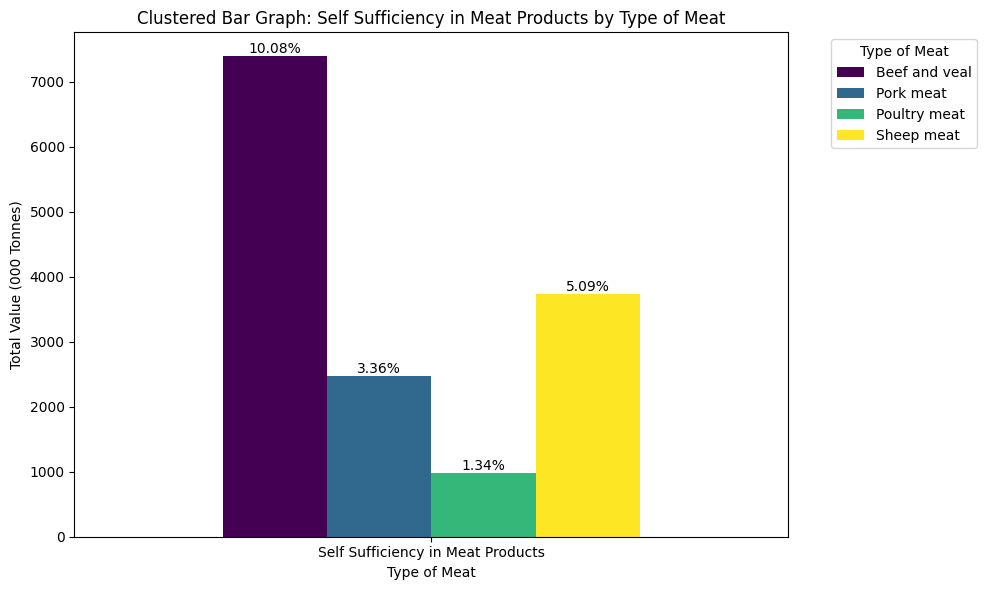

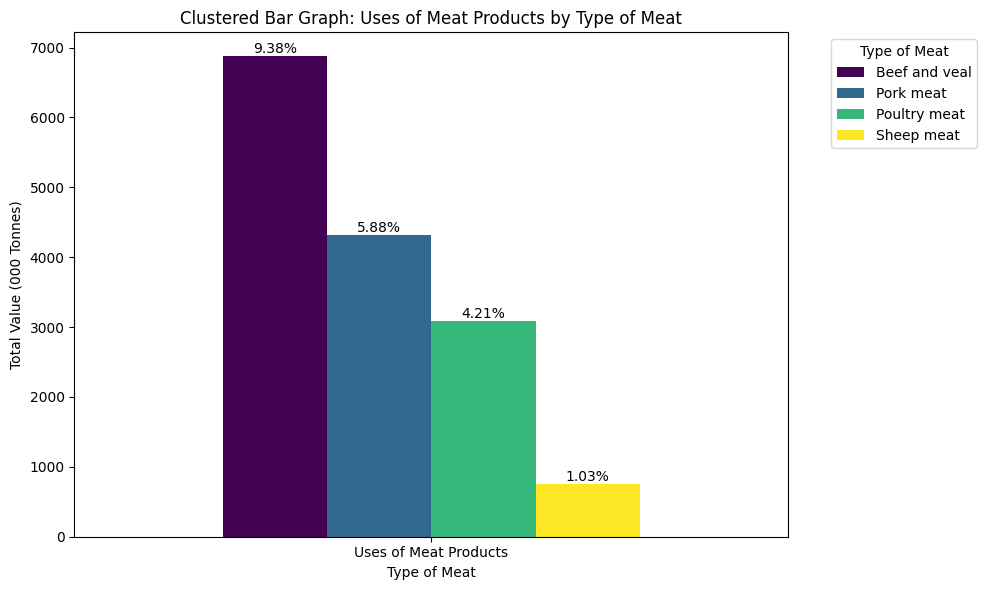

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter out unwanted observations
df_filtered = df[(df['Statistic Label'] != 'Variation in Meat Stocks') &
                 (df['Type of Meat'] != 'Total Meat')]

# Step 2: Create a Pivot Table (Statistic Label by Type of Meat)
pivot_df = df_filtered.pivot_table(
    index='Statistic Label',
    columns='Type of Meat',
    values='Quantity (000 tonnes)',
    aggfunc='sum',
    fill_value=0
)

# Step 3: Frequency Table (Sum and Percentage)
frequency_table = df_filtered.groupby('Statistic Label')['Quantity (000 tonnes)'].sum().reset_index()
frequency_table.columns = ['Statistic Label', 'Quantity (000 tonnes)']

# Calculate total and percentage frequency
total_value = frequency_table['Quantity (000 tonnes)'].sum()
frequency_table['Percentage (%)'] = (frequency_table['Quantity (000 tonnes)'] / total_value) * 100

# Append Total Row
total_row = pd.DataFrame({'Statistic Label': ['Total'],
                          'Quantity (000 tonnes)': [total_value],
                          'Percentage (%)': [100.0]})
frequency_table = pd.concat([frequency_table, total_row], ignore_index=True)

# Display the Frequency Table
print("Frequency Table:\n", frequency_table)

# Step 4: Plot Clustered Bar Graphs for Each Statistic Label
for stat_label in pivot_df.index:
    # Plot each 'Statistic Label' as a clustered bar graph
    plt.figure(figsize=(10, 6))
    pivot_df.loc[[stat_label]].plot(
        kind='bar',
        width=0.7,
        colormap='viridis',
        ax=plt.gca()
    )

    # Step 5: Add percentage labels on each bar
    for container in plt.gca().containers:
        for bar in container:
            height = bar.get_height()
            percentage = (height / total_value) * 100 if total_value > 0 else 0
            plt.annotate(f'{percentage:.2f}%',
                         (bar.get_x() + bar.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=10)

    # Step 6: Customize the Plot
    plt.xlabel('Type of Meat')
    plt.ylabel('Total Value (000 Tonnes)')
    plt.title(f'Clustered Bar Graph: {stat_label} by Type of Meat')
    plt.xticks(rotation=0)
    plt.legend(title='Type of Meat', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Display the individual plot for each Statistic Label
    plt.show()


In [11]:
# Define supply and demand lists based on categorization
supply_labels = [
  'Meat Gross Indigenous Production', 'Meat Imports',  'Meat Products for Domestic Use', 'Meat Slaughterings', 'Self Sufficiency in Meat Products'
]

demand_labels = [
    'Human Consumption of Meat Products',  'Uses of Meat Products', 'Meat Products for Domestic Use'
]

# Add a new column for classification
df['Category'] = df['Statistic Label'].apply(lambda x: 'Supply' if x in supply_labels else 'Demand')


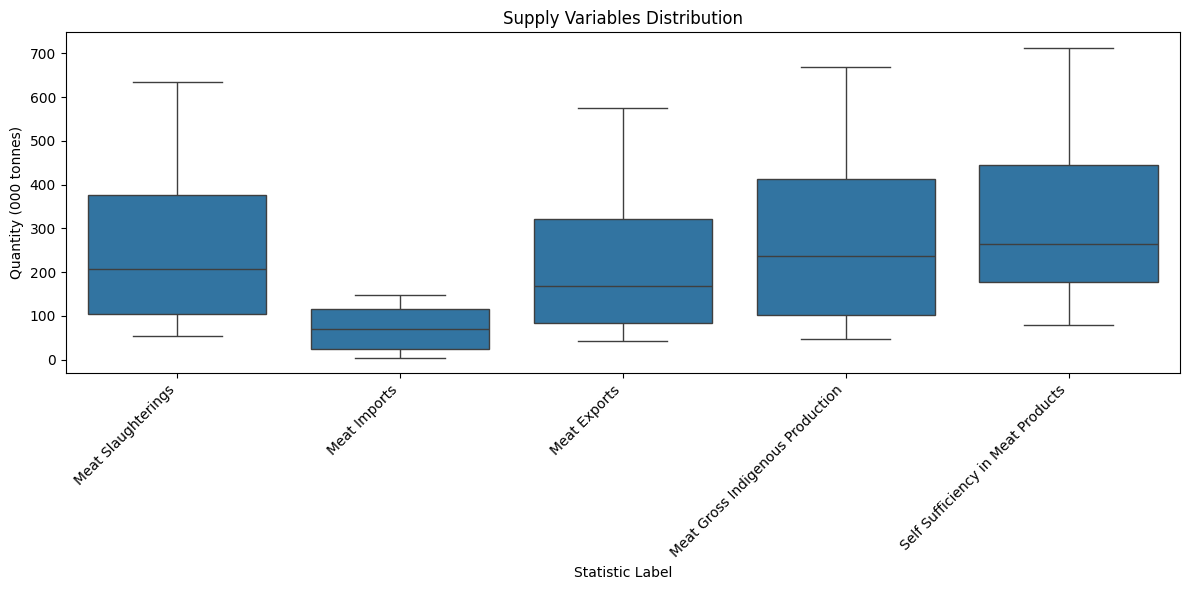

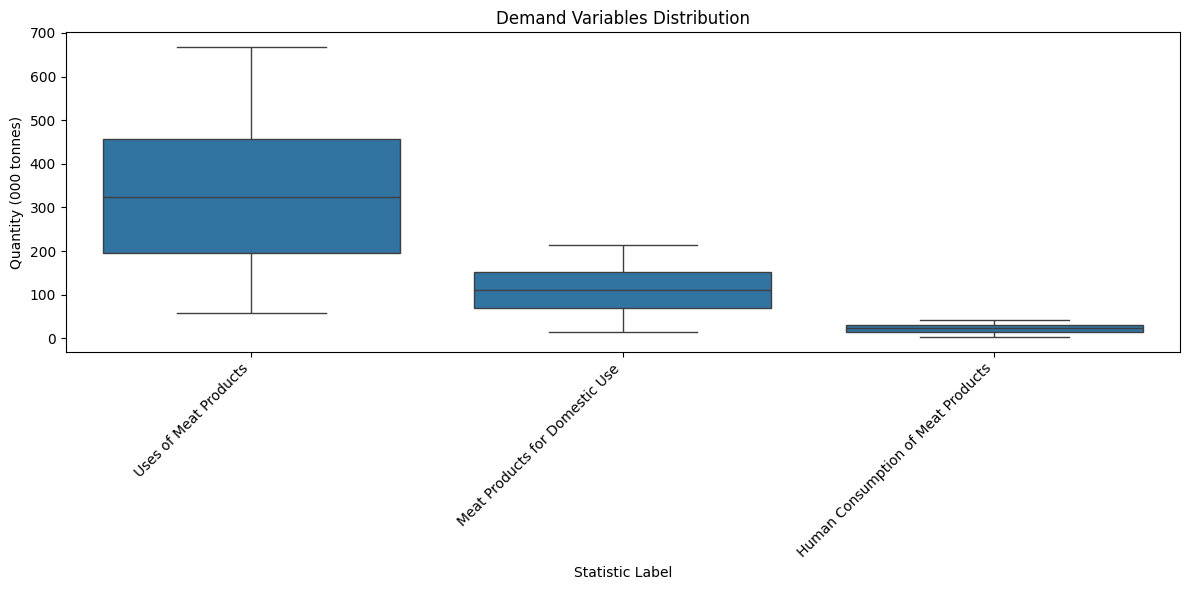

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define supply and demand lists based on categorization
supply_labels = [
  'Meat Gross Indigenous Production', 'Meat Imports', 'Meat Exports',  'Variation in Meat Stocks', 'Meat Slaughterings', 'Self Sufficiency in Meat Products'
]

demand_labels = [
    'Human Consumption of Meat Products',  'Uses of Meat Products', 'Meat Products for Domestic Use'
]

# Add a new column for classification
df['Category'] = df['Statistic Label'].apply(lambda x: 'Supply' if x in supply_labels else ('Demand' if x in demand_labels else 'Uncategorized'))

# Filter out 'Uncategorized' rows
df_filtered = df[df['Category'].isin(['Supply', 'Demand'])]

# Separate the data into supply and demand data
supply_data = df_filtered[df_filtered['Category'] == 'Supply']
demand_data = df_filtered[df_filtered['Category'] == 'Demand']

# Create a plot for all variables under Supply
plt.figure(figsize=(12, 6))
sns.boxplot(x='Statistic Label', y='Quantity (000 tonnes)', data=supply_data)
plt.xticks(rotation=45, ha='right')
plt.title('Supply Variables Distribution')
plt.tight_layout()
plt.show()

# Create a plot for all variables under Demand
plt.figure(figsize=(12, 6))
sns.boxplot(x='Statistic Label', y='Quantity (000 tonnes)', data=demand_data)
plt.xticks(rotation=45, ha='right')
plt.title('Demand Variables Distribution')
plt.tight_layout()
plt.show()


**Correlation Matrix for Meat**

Correlation Matrix for 'Type of Meat' Dummy Variables:

               Beef and veal  Pork meat  Poultry meat  Sheep meat
Beef and veal       1.000000  -0.333333     -0.333333   -0.333333
Pork meat          -0.333333   1.000000     -0.333333   -0.333333
Poultry meat       -0.333333  -0.333333      1.000000   -0.333333
Sheep meat         -0.333333  -0.333333     -0.333333    1.000000


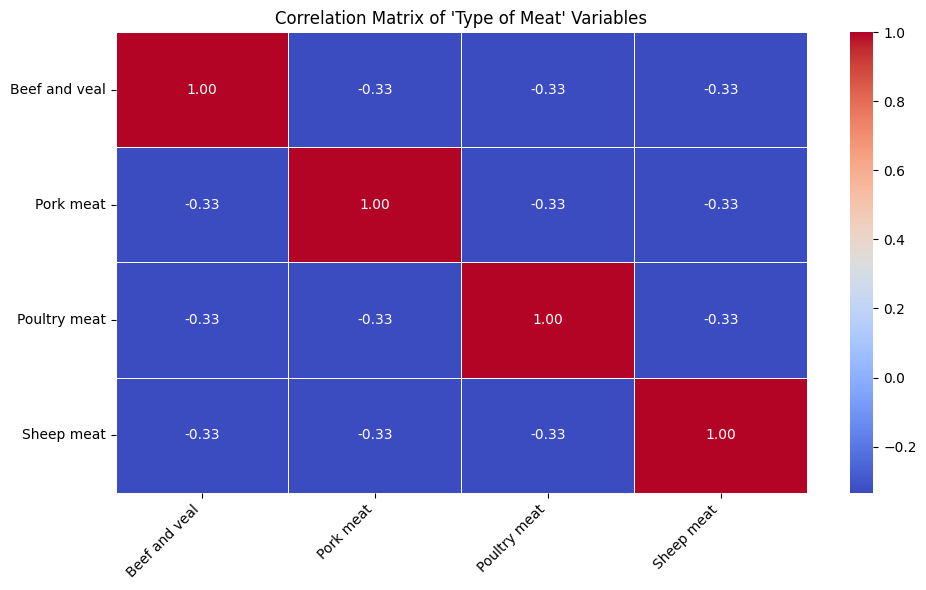

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column for classification (Supply = 1, Demand = 0)
df['Category'] = df['Statistic Label'].apply(lambda x: 1 if x in supply_labels else 0)

# Convert 'Type of Meat' to dummy variables without dropping the first category
df = pd.get_dummies(df, columns=['Type of Meat'], drop_first=False)

# Rename dummy variables to clean up column names
rename_dict = {col: col.replace("Type of Meat_", "") for col in df.columns if 'Type of Meat_' in col}
df = df.rename(columns=rename_dict)

# Select all renamed dummy variables
dummy_vars = [col for col in df.columns if col in rename_dict.values()]
X = df[dummy_vars]

# Ensure all columns are of integer type
X = X.astype(int)

# Calculate the correlation matrix for all variables
correlation_matrix = X.corr()

# Display the correlation matrix
print("Correlation Matrix for 'Type of Meat' Dummy Variables:\n")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of 'Type of Meat' Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#**Multiple Linear Regression with Demand as dependent variable**

In [14]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define supply and demand labels
supply_labels = [
    'Meat Gross Indigenous Production', 'Meat Imports', 'Meat Exports','Meat Slaughterings',
    'Self Sufficiency in Meat Products'
]

demand_labels = [
    'Human Consumption of Meat Products', 'Uses of Meat Products',
    'Meat Products for Domestic Use'
]

# Filter data for supply and demand observations
supply_data = df[df['Statistic Label'].isin(supply_labels)]
demand_data = df[df['Statistic Label'].isin(demand_labels)]

# Create pivot tables to align data by year and type
supply_pivot = supply_data.pivot_table(
    index='Year', columns='Statistic Label', values='Quantity (000 tonnes)', aggfunc='sum'
)
demand_pivot = demand_data.pivot_table(
    index='Year', columns='Statistic Label', values='Quantity (000 tonnes)', aggfunc='sum'
)

# Combine supply and demand data into one DataFrame
combined_data = supply_pivot.copy()
combined_data['Total Demand'] = demand_pivot.sum(axis=1)  # Aggregate demand observations

# Drop rows with missing values
combined_data = combined_data.dropna()

# Define independent (X) and dependent (y) variables
X = combined_data[supply_labels]  # Supply observations
y = combined_data['Total Demand']  # Dependent variable: Total Demand

# Add a constant for the intercept term
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Model summary
print("Model Summary:\n", model.summary())

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

Model Summary:
                             OLS Regression Results                            
Dep. Variable:           Total Demand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.546e+06
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           2.82e-07
Time:                        09:05:11   Log-Likelihood:                 13.706
No. Observations:                   8   AIC:                            -15.41
Df Residuals:                       2   BIC:                            -14.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


All labels (after deduplication): ['Meat Products for Domestic Use', 'Meat Slaughterings', 'Uses of Meat Products', 'Meat Exports', 'Self Sufficiency in Meat Products', 'Meat Imports', 'Human Consumption of Meat Products', 'Meat Gross Indigenous Production']


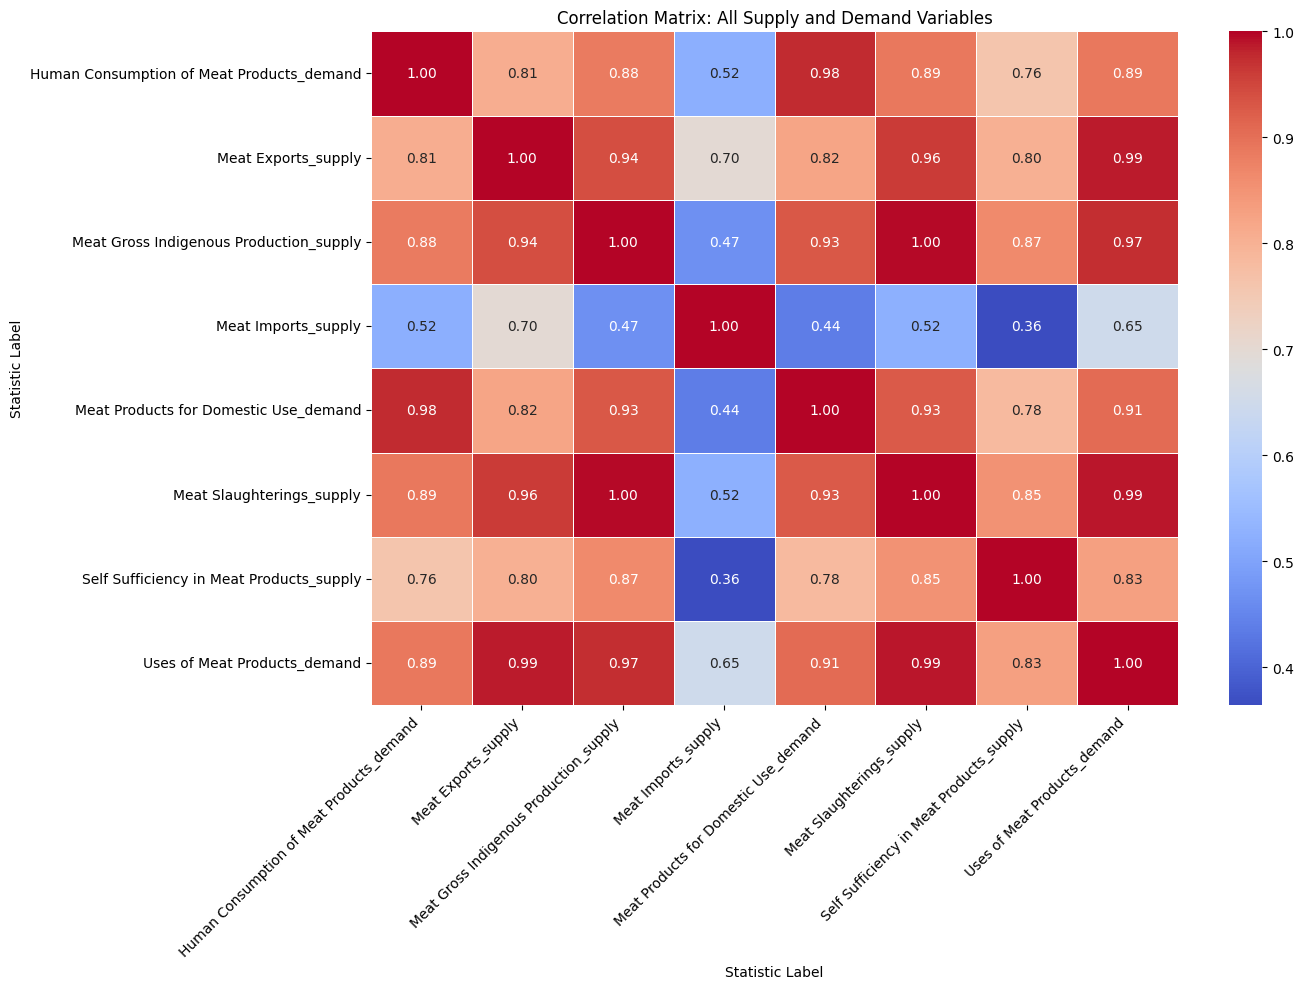

In [15]:

# Classify each 'Statistic Label' as Supply and Demand
def categorize_statistic(label):
    if label in supply_labels and label in demand_labels:
        return 'Both'
    elif label in supply_labels:
        return 'Supply'
    elif label in demand_labels:
        return 'Demand'
    else:
        return 'Uncategorized'

# Separate the data into supply and demand
supply_data = df_filtered[df_filtered['Category'] == 'Supply'].copy()
supply_data['Statistic Label'] = supply_data['Statistic Label'] + '_supply'

demand_data = df_filtered[df_filtered['Category'] == 'Demand'].copy()
demand_data['Statistic Label'] = demand_data['Statistic Label'] + '_demand'

# Merge supply and demand data back together
df_combined = pd.concat([supply_data, demand_data])

# Pivot the data to have a column for each statistic label with the appended suffixes
pivot_data = df_combined.pivot_table(index='Year', columns='Statistic Label', values='Quantity (000 tonnes)', aggfunc='mean')

# Ensure that all the supply and demand labels are represented in the final correlation matrix
all_labels = supply_labels + demand_labels
# Remove duplicate labels
unique_labels = list(set(all_labels))
print(f"All labels (after deduplication): {unique_labels}")

# Calculate the correlation matrix across all supply and demand variables
correlation_matrix = pivot_data.corr()

# Plot the full correlation matrix with a larger size and color bar
plt.figure(figsize=(14, 10))  # Adjust figure size to accommodate more variables
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Correlation Matrix: All Supply and Demand Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Frequency Table for Demand:
     Type of Meat  Quantity (000 tonnes)  Percentage (%)
0  Beef and veal            8093.510906       39.169304
1      Pork meat            6296.814491       30.474024
2   Poultry meat            5304.324345       25.670775
3     Sheep meat             968.241970        4.685898


Frequency Table for Supply:
     Type of Meat  Quantity (000 tonnes)  Percentage (%)
0  Beef and veal           26910.431592       51.094777
1      Pork meat           13133.467721       24.936486
2   Poultry meat            6956.584962       13.208452
3     Sheep meat            5667.191932       10.760285




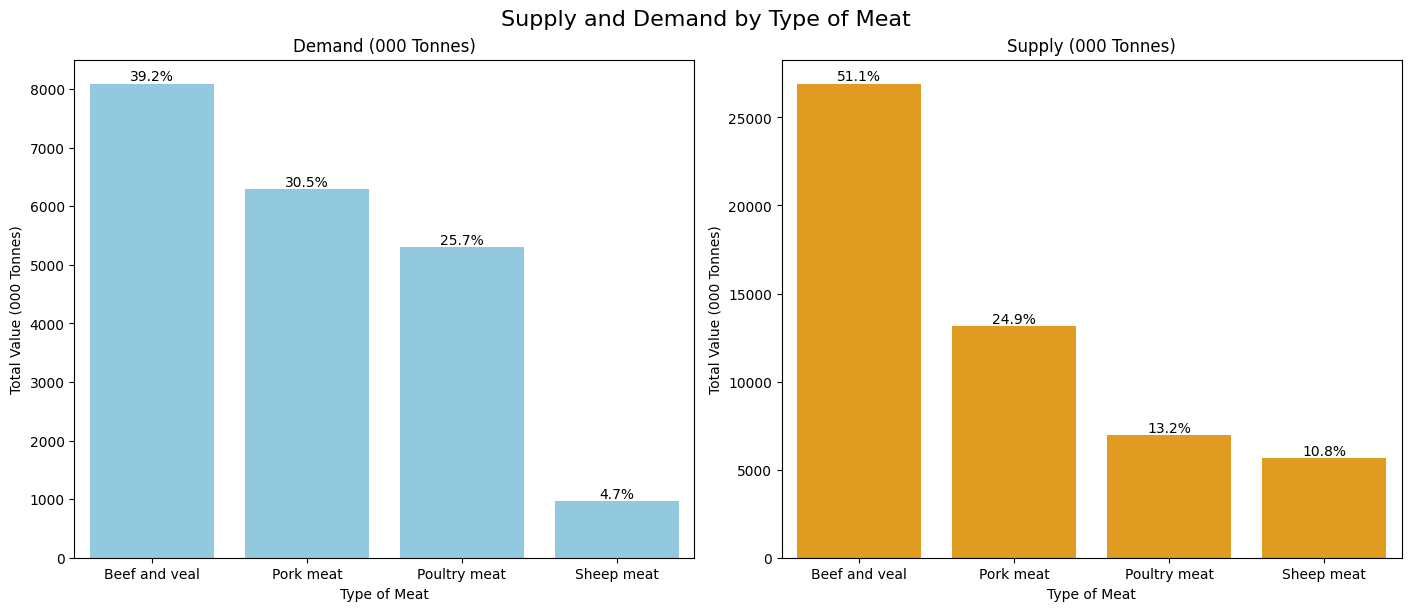

In [16]:
# Step 1: Create frequency tables with percentages for each category
frequency_tables = {}
for category in ['Demand', 'Supply']:
    category_data = df_filtered[df_filtered['Category'] == category]
    frequency_table = category_data.groupby('Type of Meat')['Quantity (000 tonnes)'].sum().reset_index()
    frequency_table.columns = ['Type of Meat', 'Quantity (000 tonnes)']

    # Calculate percentage for each Type of Meat within the category
    total_value = frequency_table['Quantity (000 tonnes)'].sum()
    frequency_table['Percentage (%)'] = (frequency_table['Quantity (000 tonnes)'] / total_value) * 100

    # Store the frequency table
    frequency_tables[category] = frequency_table

    # Display the frequency table
    print(f"Frequency Table for {category}:\n", frequency_table)
    print("\n")

# Step 2: Aggregate by Category and Type of Meat and calculate percentage
group_agg = df_filtered.groupby(['Category', 'Type of Meat'])['Quantity (000 tonnes)'].sum().reset_index()

# Calculate percentage for each Category and Type of Meat
group_agg['Percentage (%)'] = group_agg.groupby('Category')['Quantity (000 tonnes)'].transform(lambda x: (x / x.sum()) * 100)

# Step 3: Plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), constrained_layout=True, sharex=True)

# Demand Plot
demand_data = group_agg[group_agg['Category'] == 'Demand']
demand_plot = sns.barplot(data=demand_data, x='Type of Meat', y='Quantity (000 tonnes)', color="skyblue", ax=ax1)
ax1.set_title('Demand (000 Tonnes)')
ax1.set_ylabel('Total Value (000 Tonnes)')
ax1.set_xlabel('Type of Meat')

# Add percentage labels on demand bars
for bar, percentage in zip(demand_plot.patches, demand_data['Percentage (%)']):
    ax1.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
             bar.get_height(),  # Y-coordinate (top of the bar)
             f"{percentage:.1f}%",  # Percentage with 1 decimal place
             ha='center', va='bottom', fontsize=10)

# Supply Plot
supply_data = group_agg[group_agg['Category'] == 'Supply']
supply_plot = sns.barplot(data=supply_data, x='Type of Meat', y='Quantity (000 tonnes)', color='orange', ax=ax2)
ax2.set_title('Supply (000 Tonnes)')
ax2.set_ylabel('Total Value (000 Tonnes)')
ax2.set_xlabel('Type of Meat')

# Add percentage labels on supply bars
for bar, percentage in zip(supply_plot.patches, supply_data['Percentage (%)']):
    ax2.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
             bar.get_height(),  # Y-coordinate (top of the bar)
             f"{percentage:.1f}%",  # Percentage with 1 decimal place
             ha='center', va='bottom', fontsize=10)

# Set overall title
fig.suptitle("Supply and Demand by Type of Meat", fontsize=16)

# Show the plot
plt.show()


# ARIMA Modeling and Time Series Plot

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA Model Summary for Beef and veal - Supply:
                                SARIMAX Results                                
Dep. Variable:                 Supply   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -61.165
Date:                Sun, 15 Dec 2024   AIC                            128.330
Time:                        09:05:18   BIC                            129.238
Sample:                             0   HQIC                           127.334
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.003   -291.984      0.000      -1.007      -0.993
ma.L1          0.9972      0.393      2.538      0.011       0.227       1.767
sig

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA Model Summary for Pork meat - Supply:
                                SARIMAX Results                                
Dep. Variable:                 Supply   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -52.005
Date:                Sun, 15 Dec 2024   AIC                            110.010
Time:                        09:05:20   BIC                            110.918
Sample:                             0   HQIC                           109.014
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.011     89.185      0.000       0.978       1.022
ma.L1         -0.9952      0.512     -1.943      0.052      -1.999       0.009
sigma2 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA Model Summary for Sheep meat - Supply:
                                SARIMAX Results                                
Dep. Variable:                 Supply   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -49.488
Date:                Sun, 15 Dec 2024   AIC                            104.976
Time:                        09:05:21   BIC                            105.884
Sample:                             0   HQIC                           103.981
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4703      1.511     -0.311      0.756      -3.431       2.491
ma.L1          0.2707      1.798      0.151      0.880      -3.253       3.794
sigma2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA Model Summary for Poultry meat - Supply:
                                SARIMAX Results                                
Dep. Variable:                 Supply   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -48.049
Date:                Sun, 15 Dec 2024   AIC                            102.098
Time:                        09:05:22   BIC                            103.005
Sample:                             0   HQIC                           101.102
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1217      0.688     -0.177      0.860      -1.470       1.226
ma.L1          0.6675      0.756      0.883      0.377      -0.813       2.148
sigm

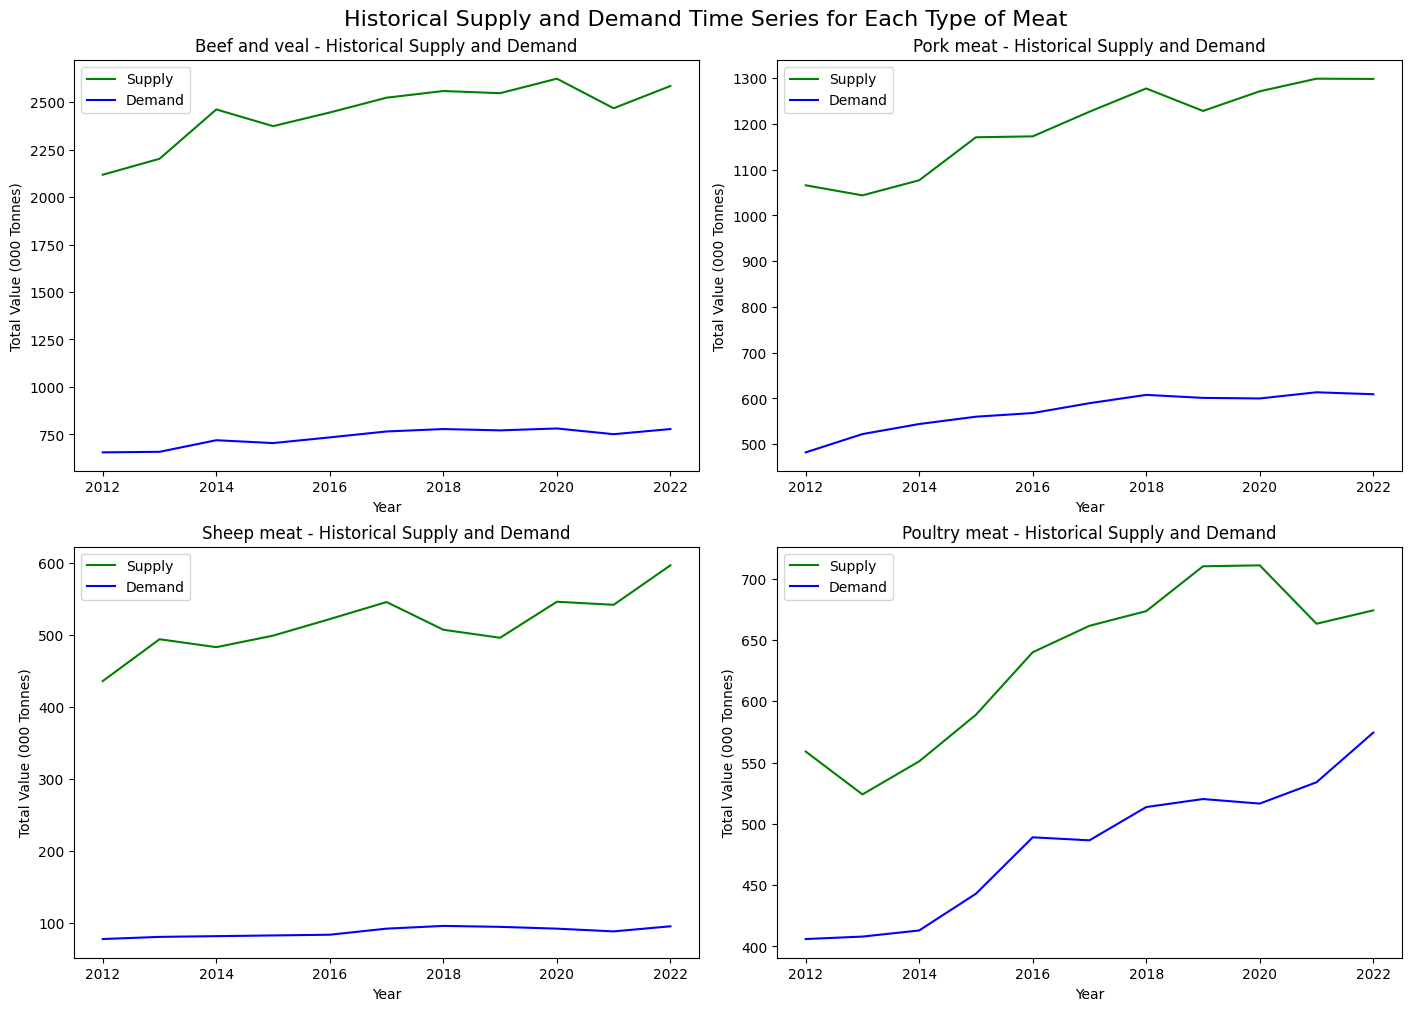

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Define supply and demand lists based on categorization
supply_labels = [
  'Meat Gross Indigenous Production', 'Meat Imports', 'Meat Exports',  'Variation in Meat Stocks', 'Meat Slaughterings', 'Self Sufficiency in Meat Products'
]

demand_labels = [
    'Human Consumption of Meat Products',  'Uses of Meat Products', 'Meat Products for Domestic Use'
]

# Add a new column for classification
df['Category'] = df['Statistic Label'].apply(lambda x: 'Supply' if x in supply_labels else ('Demand' if x in demand_labels else 'Uncategorized'))

# Convert 'Year' column to datetime if it's not already
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Filter the data to exclude 'Total Meat'
#df_filtered = df[df['Type of Meat'] != 'Total Meat']

# Set up plot for each Type of Meat's Supply and Demand time series
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), constrained_layout=True)
axs = axs.flatten()

# Iterate over each Type of Meat
for i, meat_type in enumerate(df_filtered['Type of Meat'].unique()):
    ax = axs[i]

    # Filter data for current meat type and aggregate to avoid duplicates
    meat_data = df_filtered[df_filtered['Type of Meat'] == meat_type]
    meat_data_agg = meat_data.groupby(['Year', 'Category'])['Quantity (000 tonnes)'].sum().reset_index()

    # Create pivot table for Supply and Demand time series
    pivot_data = meat_data_agg.pivot(index='Year', columns='Category', values='Quantity (000 tonnes)')

    # Check if both Supply and Demand series exist for ARIMA modeling
    if 'Supply' in pivot_data.columns and 'Demand' in pivot_data.columns:
        supply_ts = pivot_data['Supply'].dropna()
        demand_ts = pivot_data['Demand'].dropna()

        # Fit ARIMA models for both Supply and Demand
        supply_model = sm.tsa.ARIMA(supply_ts, order=(1, 1, 1))
        demand_model = sm.tsa.ARIMA(demand_ts, order=(1, 1, 1))

        supply_fit = supply_model.fit()
        demand_fit = demand_model.fit()

        # Print ARIMA model summaries for Supply and Demand
        print(f"ARIMA Model Summary for {meat_type} - Supply:\n", supply_fit.summary())
        print(f"ARIMA Model Summary for {meat_type} - Demand:\n", demand_fit.summary())

        # Plot historical data
        sns.lineplot(x=supply_ts.index, y=supply_ts.values, ax=ax, color="green", label="Supply")
        sns.lineplot(x=demand_ts.index, y=demand_ts.values, ax=ax, color="blue", label="Demand")

        ax.set_title(f"{meat_type} - Historical Supply and Demand")
        ax.set_ylabel("Total Value (000 Tonnes)")
        ax.set_xlabel("Year")
        ax.legend()

plt.suptitle("Historical Supply and Demand Time Series for Each Type of Meat", fontsize=16)
plt.show()

# Forecasting for Supply and Demand

In [18]:
# Melt the DataFrame to combine meat columns into a single 'Type of Meat' column
df_melted = df.melt(id_vars=['Statistic Label', 'Year', 'Quantity (000 tonnes)', 'Category'],
                    value_vars=['Beef and veal', 'Pork meat', 'Poultry meat', 'Sheep meat'],
                    var_name='Type of Meat', value_name='Quantity')

# Add the new 'Type of Meat' to the original df
df = pd.merge(df, df_melted[['Statistic Label', 'Year', 'Type of Meat']], on=['Statistic Label', 'Year'], how='left')

# Display the updated DataFrame
print(df.head())


      Statistic Label       Year  Quantity (000 tonnes) Category  \
0  Meat Slaughterings 2012-01-01                  495.0   Supply   
1  Meat Slaughterings 2012-01-01                  495.0   Supply   
2  Meat Slaughterings 2012-01-01                  495.0   Supply   
3  Meat Slaughterings 2012-01-01                  495.0   Supply   
4  Meat Slaughterings 2012-01-01                  495.0   Supply   

   Beef and veal  Pork meat  Poultry meat  Sheep meat   Type of Meat  
0           True      False         False       False  Beef and veal  
1           True      False         False       False  Beef and veal  
2           True      False         False       False  Beef and veal  
3           True      False         False       False  Beef and veal  
4           True      False         False       False      Pork meat  


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

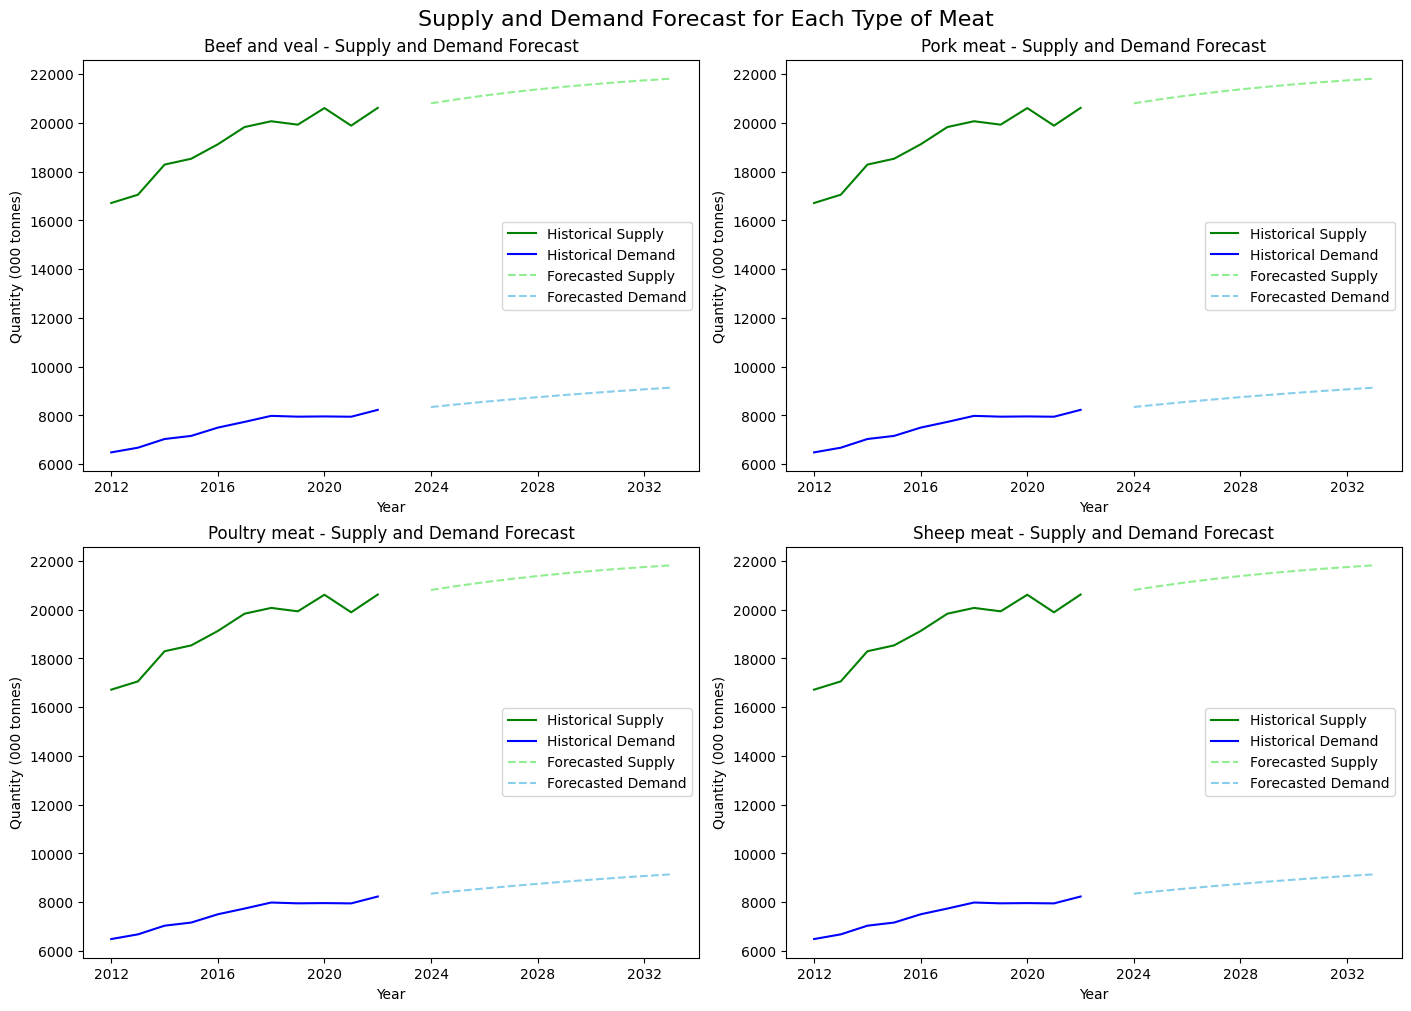

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Sample data loading (replace with your actual data)
# df = pd.read_csv('your_data.csv')

# Define supply and demand lists based on categorization
supply_labels = [
  'Meat Gross Indigenous Production', 'Meat Imports', 'Meat Exports',  'Variation in Meat Stocks', 'Meat Slaughterings', 'Self Sufficiency in Meat Products'
]

demand_labels = [
    'Human Consumption of Meat Products',  'Uses of Meat Products', 'Meat Products for Domestic Use'
]

# Add a new column for classification
df['Category'] = df['Statistic Label'].apply(lambda x: 'Supply' if x in supply_labels else ('Demand' if x in demand_labels else 'Uncategorized'))

# Convert 'Year' column to datetime if it's not already
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Filter the data to exclude 'Total Meat'
#df_filtered = df[df['Type of Meat'] != 'Total Meat']

# Forecast horizon in years
forecast_years = 10  # You can set this to any number

# Set up plot for each Type of Meat's Supply and Demand time series with forecasts
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), constrained_layout=True)
axs = axs.flatten()

# Iterate over each Type of Meat
for i, meat_type in enumerate(df['Type of Meat'].unique()):
    ax = axs[i]

    # Filter data for current meat type and aggregate to avoid duplicates
    meat_data = df[df['Type of Meat'] == meat_type]
    meat_data_agg = meat_data.groupby(['Year', 'Category'])['Quantity (000 tonnes)'].sum().reset_index()

    # Create pivot table for Supply and Demand time series
    pivot_data = meat_data_agg.pivot(index='Year', columns='Category', values='Quantity (000 tonnes)')

    # Ensure that the index is a DatetimeIndex
    pivot_data.index = pd.to_datetime(pivot_data.index, format='%Y')

    # Check if both Supply and Demand series exist for ARIMA modeling
    if 'Supply' in pivot_data.columns and 'Demand' in pivot_data.columns:
        supply_ts = pivot_data['Supply'].dropna()
        demand_ts = pivot_data['Demand'].dropna()

        # Fit ARIMA models for both Supply and Demand
        supply_model = sm.tsa.ARIMA(supply_ts, order=(1, 1, 1))
        demand_model = sm.tsa.ARIMA(demand_ts, order=(1, 1, 1))

        supply_fit = supply_model.fit()
        demand_fit = demand_model.fit()

        # Forecast the next 'forecast_years' years
        supply_forecast = supply_fit.forecast(steps=forecast_years)
        demand_forecast = demand_fit.forecast(steps=forecast_years)

        # Generate future dates for the forecast period
        last_year = supply_ts.index[-1].year
        forecast_dates = pd.date_range(start=f"{last_year + 1}", periods=forecast_years, freq='Y')

        # Plot historical data
        sns.lineplot(x=supply_ts.index, y=supply_ts.values, ax=ax, color="green", label="Historical Supply")
        sns.lineplot(x=demand_ts.index, y=demand_ts.values, ax=ax, color="blue", label="Historical Demand")

        # Plot forecasted data
        sns.lineplot(x=forecast_dates, y=supply_forecast, ax=ax, color="lightgreen", linestyle="--", label="Forecasted Supply")
        sns.lineplot(x=forecast_dates, y=demand_forecast, ax=ax, color="skyblue", linestyle="--", label="Forecasted Demand")

        ax.set_title(f"{meat_type} - Supply and Demand Forecast")
        ax.set_ylabel("Quantity (000 tonnes)")
        ax.set_xlabel("Year")
        ax.legend()

# Set the main title for the plots
plt.suptitle("Supply and Demand Forecast for Each Type of Meat", fontsize=16)
plt.show()


# Logistic Regression model

Optimization terminated successfully.
         Current function value: 0.640121
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Category   No. Observations:                 4505
Model:                          Logit   Df Residuals:                     4500
Method:                           MLE   Df Model:                            4
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                 0.03607
Time:                        09:05:37   Log-Likelihood:                -2883.7
converged:                       True   LL-Null:                       -2991.7
Covariance Type:            nonrobust   LLR p-value:                 1.485e-45
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0344      0.070      0.490      0.624      -0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


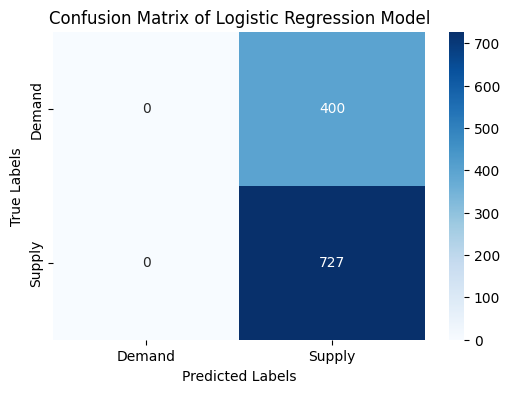

In [20]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column for classification (1 = Supply, 0 = Demand)
df['Category'] = df['Statistic Label'].apply(lambda x: 1 if x in supply_labels else 0)

# Convert 'Type of Meat' to dummy variables without renaming columns
df = pd.get_dummies(df, columns=['Type of Meat'], drop_first=True)

# Define independent variables (Quantity (000 tonnes) and dummy variables for 'Type of Meat')
independent_vars = ['Quantity (000 tonnes)'] + list(df.columns[df.columns.str.contains('Type of Meat')])
X = df[independent_vars]
y = df['Category']

# Convert all boolean columns in X to integers
X = X.astype({col: 'int' for col in X.select_dtypes(include=['bool']).columns})

# Add a constant to the independent variables
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model on the training dataset
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Display the logistic regression summary
print(result.summary())

# Predict on the test set
y_pred = result.predict(X_test) > 0.5  # Convert probabilities to binary predictions

# Evaluate the model using the test dataset
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Demand", "Supply"], yticklabels=["Demand", "Supply"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()
